<a href="https://colab.research.google.com/github/pradiptars/ML_car_price/blob/main/kaggle_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

Saving car_price_dataset.csv to car_price_dataset.csv


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
df = pd.read_csv("car_price_dataset.csv")

In [14]:
df.head(2)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092


In [15]:
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


<Axes: >

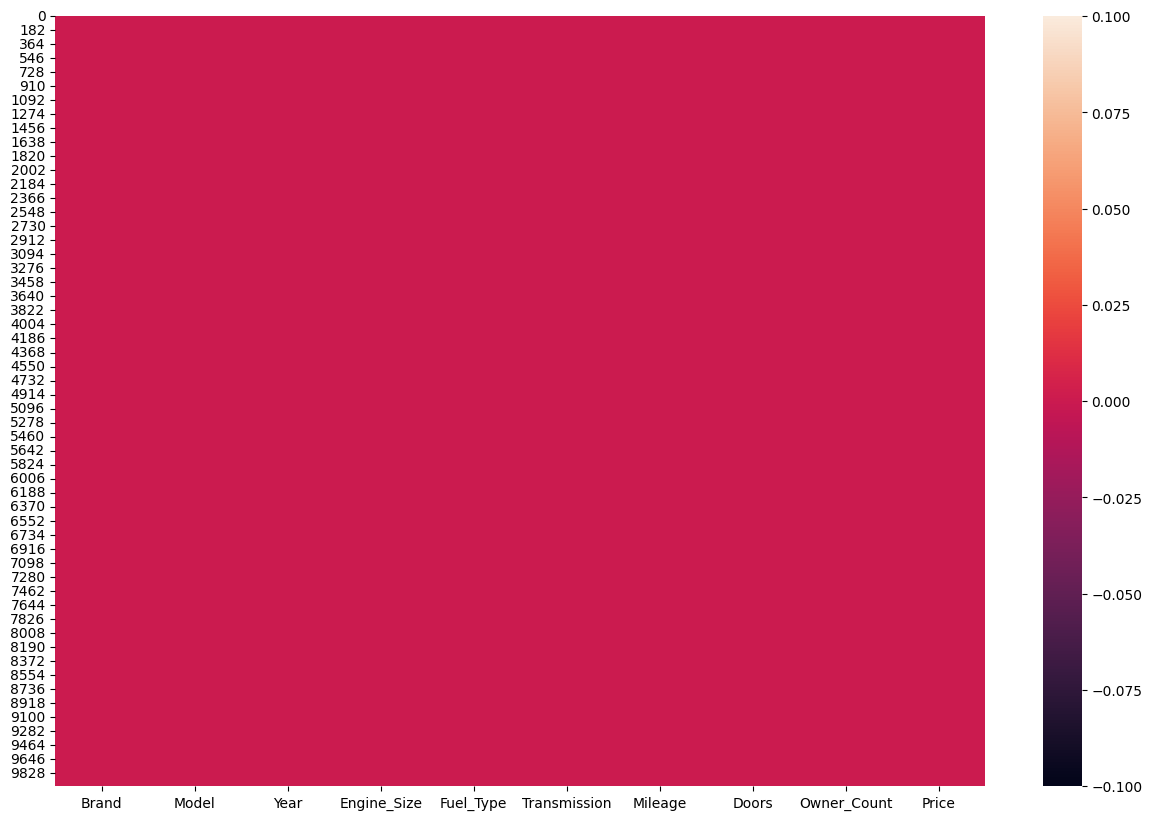

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [19]:
num_var = df.select_dtypes(include='number').columns
num_var

Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price'], dtype='object')

<Axes: >

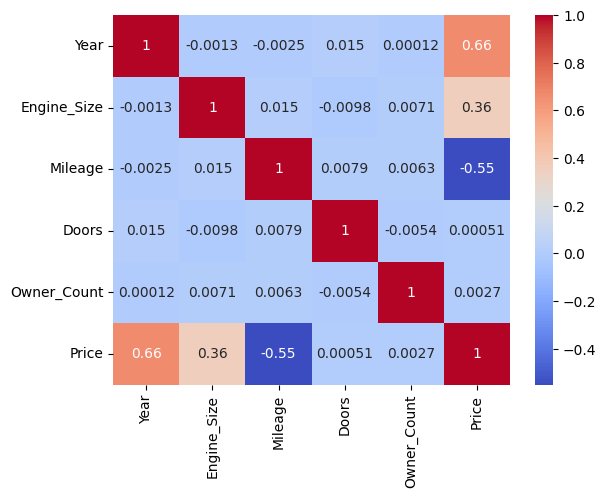

In [20]:
sns.heatmap(df[num_var].corr(), cmap='coolwarm', annot=True)

In [21]:
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object')

In [23]:
df['Brand'].value_counts()

,count
Brand,
Ford,1048
Audi,1038
Volkswagen,1020
Honda,1009
Chevrolet,1003
BMW,999
Hyundai,995
Kia,976
Toyota,970


In [25]:
df['Model'].value_counts()

,count
Model,
Accord,365
Fiesta,363
Impala,355
5 Series,353
Tiguan,352
Focus,351
Q5,350
A4,350
Elantra,347


In [26]:
df.head(6)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242


In [27]:
df1 = pd.get_dummies(df, drop_first=True, columns=['Brand', 'Fuel_Type', 'Transmission'], dtype='int64')
df1.head()

,Model,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,Rio,2020,4.2,289944,3,5,8501,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,Malibu,2012,2.0,5356,2,3,12092,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,GLA,2020,4.2,231440,4,2,11171,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Q5,2023,2.0,160971,2,1,11780,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,Golf,2003,2.6,286618,3,3,2867,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [29]:
df1 = df1.drop(['Model'], axis=1)
df1.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2023,2.0,160971,2,1,11780,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,0,0,0,0,1,0,1,0,0,1


<Axes: >

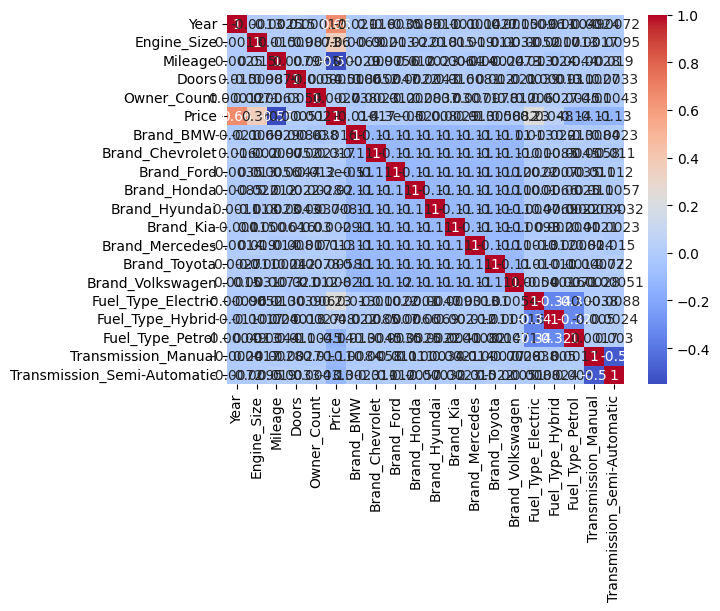

In [30]:
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

In [31]:
X = df1.drop(['Price'], axis=1)
y = df1['Price']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()


In [35]:
def rsme(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [36]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
lr_rmse = rsme(y_test, y_pred)
lr_score, lr_rmse

(0.9995433341795722, 64.77468360271655)

In [37]:
lr_lasso.fit(X_train, y_train)
y_pred = lr_lasso.predict(X_test)
lr_lasso_score = lr_lasso.score(X_test, y_test)
lr_lasso_rmse = rsme(y_test, y_pred)
lr_lasso_score, lr_lasso_rmse

(0.9995418341334299, 64.88098163214681)

In [38]:
lr_ridge.fit(X_train, y_train)
y_pred = lr_ridge.predict(X_test)
lr_ridge_score = lr_ridge.score(X_test, y_test)
lr_ridge_rmse = rsme(y_test, y_pred)
lr_ridge_score, lr_ridge_rmse

(0.9995427718978213, 64.8145490979042)

In [39]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_score = svr.score(X_test, y_test)
svr_rmse = rsme(y_test, y_pred)
svr_score, svr_rmse

(0.06222587220247122, 2935.3180820483935)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
rf_rmse = rsme(y_test, y_pred)
rf_score, rf_rmse

(0.9699279871692603, 525.6386551625556)

In [42]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_score = xgb.score(X_test, y_test)
xgb_rmse = rsme(y_test, y_pred)
xgb_score, xgb_rmse

(0.9936637878417969, 241.27925664569676)

In [43]:

print(pd.DataFrame([{'Model': 'Linierregration', 'Score': lr_score, 'RSME' : lr_rmse},
                    {'Model': 'Lasso', 'Score': lr_lasso_score, 'RSME' : lr_lasso_rmse},
                    {'Model': 'Ridge', 'Score': lr_ridge_score, 'RSME' : lr_ridge_rmse},
                    {'Model': 'SupportVactor', 'Score': svr_score, 'RSME' : svr_rmse},
                    {'Model': 'RandomForest', 'Score': rf_score, 'RSME' : rf_rmse},
                    {'Model': 'XGboost', 'Score': xgb_score, 'RSME' : xgb_rmse}],
                   columns=['Model', 'Score', 'RSME']))

             Model     Score         RSME
0  Linierregration  0.999543    64.774684
1            Lasso  0.999542    64.880982
2            Ridge  0.999543    64.814549
3    SupportVactor  0.062226  2935.318082
4     RandomForest  0.969928   525.638655
5          XGboost  0.993664   241.279257


In [44]:
from sklearn.model_selection import cross_val_score, KFold
cvs = cross_val_score(xgb, X_train, y_train, cv=10)
cvs, cvs.mean()


(array([0.99358463, 0.99399859, 0.99346924, 0.99385017, 0.99504739,
        0.99313414, 0.99365336, 0.99387914, 0.99484789, 0.99443394]),
 0.9939898490905762)

In [45]:
import joblib
joblib.dump(xgb, 'house_price.pkl')

['house_price.pkl']